# Data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import 1 - Prepare Data.load_and_filter_market_returns 



# Sti til usa_dsf.parquet
file_path_usa_dsf = "./Data/usa_dsf.parquet"
file_path_usa = "./Data/usa.parquet"
file_path_crsp_a_stock_with_id = "./Data/crsp_a_stock_codes.csv"
file_path_tsla = "./Data/tsla101.csv"

In [2]:
df = pd.read_parquet(file_path_usa_dsf, engine='pyarrow')
print("Fil indlæst med succes.")

Fil indlæst med succes.


In [3]:
print("\nKolonner i datafilen:")
print(df.columns.tolist())
print("\nDataens størrelse:")
print(df.shape)
print("\nDatatyper for hver kolonne:")
print(df.dtypes)
df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)  # Bekræft ændringen


Kolonner i datafilen:
['id', 'date', 'ret_exc']

Dataens størrelse:
(176877668, 3)

Datatyper for hver kolonne:
id           int32
date        object
ret_exc    float64
dtype: object
id                  int32
date       datetime64[ns]
ret_exc           float64
dtype: object


In [4]:
print("\nOversigt over data:")
print(df.head())


Oversigt over data:
      id       date   ret_exc
0  10000 1986-01-08 -0.024622
1  10000 1986-01-09 -0.000232
2  10000 1986-01-10 -0.000232
3  10000 1986-01-13  0.049768
4  10000 1986-01-14  0.047387


In [5]:
# Find antallet af unikke værdier i id-kolonnen
unique_ids = df['id'].nunique()
print(f"Antal unikke id'er: {unique_ids}")


Antal unikke id'er: 63456


In [6]:
# Filtrér data for id = 10000
us_id_10000 = df[df['id'] == 10000]

# Vis de første par rækker i det nye dataset
print(us_id_10000.head())

# Kontroller størrelsen af det nye dataset
print(f"Antal rækker i us_id_10000: {us_id_10000.shape[0]}")


      id       date   ret_exc
0  10000 1986-01-08 -0.024622
1  10000 1986-01-09 -0.000232
2  10000 1986-01-10 -0.000232
3  10000 1986-01-13  0.049768
4  10000 1986-01-14  0.047387
Antal rækker i us_id_10000: 361


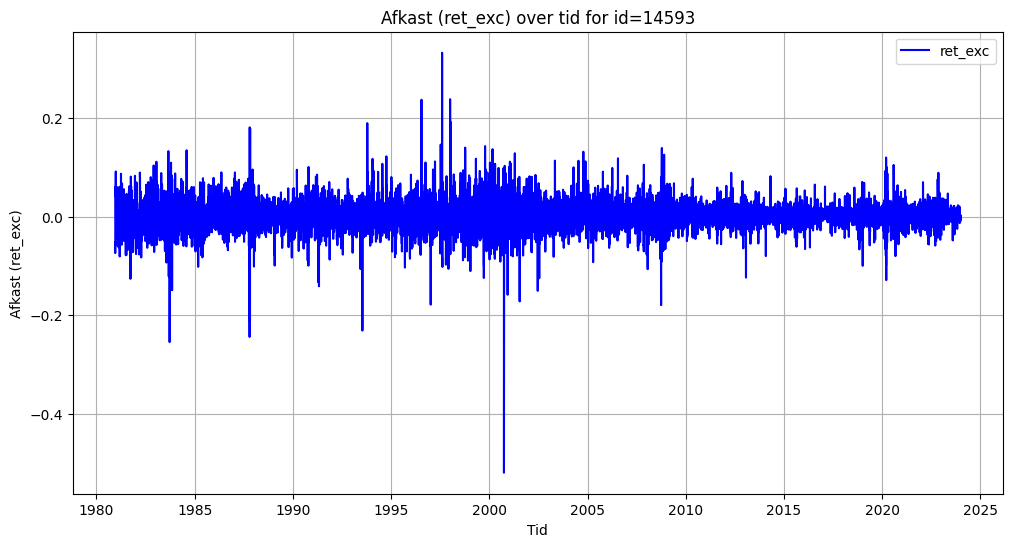

In [7]:
id_number =14593

data_to_plot = df[df['id'] == id_number]

plt.figure(figsize=(12, 6))
plt.plot(data_to_plot['date'], data_to_plot['ret_exc'], label='ret_exc', color='blue')

# Tilføj titler og labels
plt.title(f"Afkast (ret_exc) over tid for id={id_number}")
plt.xlabel("Tid")
plt.ylabel("Afkast (ret_exc)")
plt.grid(True)
plt.legend()
plt.show()

In [8]:
latest_row = df.loc[df['date'].idxmax()]

# Udskriv resultatet
latest_id = latest_row['id']
latest_date = latest_row['date']
print(f"ID med den seneste dato: {latest_id}")
print(f"Den seneste dato: {latest_date}")

ID med den seneste dato: 100100401
Den seneste dato: 2024-01-31 00:00:00


# få id

In [9]:
# Udtræk unikke ID'er
unique_ids = df['id'].unique()

# Gem unikke ID'er som en txt-fil
with open("unique_ids.txt", "w") as f:
    for unique_id in unique_ids:
        f.write(f"{unique_id}\n")

print("Filen 'unique_ids.txt' med unikke id'er er gemt.")


Filen 'unique_ids.txt' med unikke id'er er gemt.


In [11]:
unique_ids

array([    10000,     10001,     10002, ..., 135394590, 135400301,
       135612890])

# USA file

In [12]:
df_usa = pd.read_parquet(file_path_usa, engine='pyarrow')
print("Fil indlæst med succes.")

Fil indlæst med succes.


In [13]:
df_usa

,eom_ret,id,eom,valid_ret,excntry,me,sic,size_grp,ret_exc_lead1m,niq_su,...,ni_be,ocf_at,ocf_at_chg1,mispricing_perf,mispricing_mgmt,qmj,qmj_prof,qmj_growth,qmj_safety,ctff_test
0,1952-09-30,10006,1952-08-31,True,USA,23.885125,3740,small,-0.056756,NaN,...,0.100695,0.084642,0.038812,0.637818,0.669017,NaN,0.274990,NaN,-0.329044,False
1,1952-10-31,10006,1952-09-30,True,USA,22.076500,3740,small,-0.046028,NaN,...,0.100695,0.084642,0.038812,0.653567,0.627405,NaN,0.297905,NaN,-0.364834,False
2,1952-11-30,10006,1952-10-31,True,USA,21.088000,3740,small,0.112232,NaN,...,0.100695,0.084642,0.038812,0.497829,0.625762,NaN,0.342228,NaN,-0.244439,False
3,1952-12-31,10006,1952-11-30,True,USA,23.476875,3740,small,0.050879,NaN,...,0.100695,0.084642,0.038812,0.462569,0.626470,NaN,0.357438,NaN,-0.196596,False
4,1953-01-31,10006,1952-12-31,True,USA,24.218250,3740,small,-0.035634,NaN,...,0.100695,0.084642,0.038812,0.575019,0.667461,NaN,0.395463,NaN,-0.223198,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373906,2020-06-30,129307001,2020-05-31,True,USA,1200.174950,6159,small,0.048621,-2.434489,...,0.138361,0.084512,0.185122,0.231834,0.503674,0.654589,1.562809,-0.308437,-0.021737,True
1373907,2020-07-31,129307001,2020-06-30,True,USA,1258.661300,6159,small,0.226496,-2.434489,...,0.138361,0.084512,0.185122,0.221448,0.508204,0.647734,1.562192,-0.314682,-0.030611,True
1373908,2020-08-31,129307001,2020-07-31,True,USA,1543.864400,6159,small,0.077106,-0.616114,...,0.103204,0.071433,-0.070719,0.484592,0.556104,0.264856,1.392421,-0.847281,0.183288,True
1373909,2020-09-30,129307001,2020-08-31,True,USA,1663.027600,6159,small,0.064202,-0.616114,...,0.103204,0.071433,-0.070719,0.662569,0.558626,0.330667,1.412538,-0.813256,0.218772,True


In [14]:
print("\nKolonner i datafilen:")
print(df_usa.columns.tolist())
print("\nDataens størrelse:")
print(df_usa.shape)
print("\nDatatyper for hver kolonne:")
print(df.dtypes)



Kolonner i datafilen:
['eom_ret', 'id', 'eom', 'valid_ret', 'excntry', 'me', 'sic', 'size_grp', 'ret_exc_lead1m', 'niq_su', 'ret_6_1', 'ret_12_1', 'saleq_su', 'tax_gr1a', 'ni_inc8q', 'prc_highprc_252d', 'resff3_6_1', 'resff3_12_1', 'be_me', 'debt_me', 'at_me', 'ret_60_12', 'ni_me', 'fcf_me', 'div12m_me', 'eqpo_me', 'eqnpo_me', 'sale_gr3', 'sale_gr1', 'ebitda_mev', 'sale_me', 'ocf_me', 'ival_me', 'bev_mev', 'netdebt_me', 'eq_dur', 'capex_abn', 'at_gr1', 'ppeinv_gr1a', 'noa_at', 'noa_gr1a', 'lnoa_gr1a', 'capx_gr1', 'capx_gr2', 'capx_gr3', 'chcsho_12m', 'eqnpo_12m', 'debt_gr3', 'inv_gr1', 'inv_gr1a', 'oaccruals_at', 'taccruals_at', 'cowc_gr1a', 'coa_gr1a', 'col_gr1a', 'nncoa_gr1a', 'ncoa_gr1a', 'ncol_gr1a', 'nfna_gr1a', 'sti_gr1a', 'lti_gr1a', 'fnl_gr1a', 'be_gr1a', 'oaccruals_ni', 'taccruals_ni', 'netis_at', 'eqnetis_at', 'dbnetis_at', 'niq_be', 'niq_be_chg1', 'niq_at', 'niq_at_chg1', 'ebit_bev', 'ebit_sale', 'sale_bev', 'at_turnover', 'gp_at', 'gp_atl1', 'ope_be', 'ope_bel1', 'op_at', 

In [15]:
# Find antallet af unikke værdier i id-kolonnen
unique_ids = df_usa['id'].nunique()
print(f"Antal unikke id'er: {unique_ids}")


Antal unikke id'er: 12476


In [16]:
# crsp id 
# Indlæs filen som en DataFrame
try:
    crsp_a_stock_df = pd.read_csv(file_path_crsp_a_stock_with_id)
    print("Filen er indlæst succesfuldt.")
    
    # Tjek DataFrame-indholdet
    print("\nDe første par rækker i filen:")
    print(crsp_a_stock_df.head())
    
    # Tjek kolonnerne
    print("\nKolonnenavne:")
    print(crsp_a_stock_df.columns.tolist())
    
except Exception as e:
    print(f"Der opstod en fejl ved indlæsning af filen: {e}")

Filen er indlæst succesfuldt.

De første par rækker i filen:
   PERMNO        date TICKER                  COMNAM  PERMCO
0   10026  2018-08-01   JJSF  J & J SNACK FOODS CORP    7976
1   10026  2018-08-02   JJSF  J & J SNACK FOODS CORP    7976
2   10026  2018-08-03   JJSF  J & J SNACK FOODS CORP    7976
3   10026  2018-08-06   JJSF  J & J SNACK FOODS CORP    7976
4   10026  2018-08-07   JJSF  J & J SNACK FOODS CORP    7976

Kolonnenavne:
['PERMNO', 'date', 'TICKER', 'COMNAM', 'PERMCO']


In [17]:
# Filtrér unikke kombinationer af PERMNO og COMNAM
unique_id_company_df = crsp_a_stock_df[['PERMNO', 'COMNAM']].drop_duplicates()

# Vis de første par rækker i den nye DataFrame
print(unique_id_company_df.head())

# Kontroller størrelsen af den nye DataFrame
print(f"Antal unikke id'er og firmanavne: {unique_id_company_df.shape[0]}")


      PERMNO                           COMNAM
0      10026           J & J SNACK FOODS CORP
1363   10028            D G S E COMPANIES INC
1711   10028                      ENVELA CORP
2726   10032                      PLEXUS CORP
4089   10044  ROCKY MOUNTAIN CHOC FAC INC NEW
Antal unikke id'er og firmanavne: 14374


In [18]:
df.head()

,id,date,ret_exc
0,10000,1986-01-08,-0.024622
1,10000,1986-01-09,-0.000232
2,10000,1986-01-10,-0.000232
3,10000,1986-01-13,0.049768
4,10000,1986-01-14,0.047387


In [19]:
# Sørg for, at kolonnenavne matcher for join
unique_id_company_df.rename(columns={'PERMNO': 'id'}, inplace=True)

# Join firmanavne til df
df_with_names = df.merge(unique_id_company_df, on='id', how='left')

# Vis de første par rækker i det nye dataset
print(df_with_names.head())

# Kontroller størrelsen af det nye dataset
print(f"Størrelsen på det nye dataset: {df_with_names.shape}")


      id       date   ret_exc COMNAM
0  10000 1986-01-08 -0.024622    NaN
1  10000 1986-01-09 -0.000232    NaN
2  10000 1986-01-10 -0.000232    NaN
3  10000 1986-01-13  0.049768    NaN
4  10000 1986-01-14  0.047387    NaN
Størrelsen på det nye dataset: (181680839, 4)


In [20]:
df_with_names.tail()

,id,date,ret_exc,COMNAM
181680834,135612890,2024-01-25,-0.004723,NaN
181680835,135612890,2024-01-26,-0.000775,NaN
181680836,135612890,2024-01-29,0.020072,NaN
181680837,135612890,2024-01-30,-0.015359,NaN
181680838,135612890,2024-01-31,0.003618,NaN


In [21]:
new_df_with_names = df_with_names.dropna()


In [22]:
new_df_with_names

,id,date,ret_exc,COMNAM
99652,10026,1986-02-05,0.042301,J & J SNACK FOODS CORP
99653,10026,1986-02-06,-0.034266,J & J SNACK FOODS CORP
99654,10026,1986-02-07,-0.014337,J & J SNACK FOODS CORP
99655,10026,1986-02-10,0.014034,J & J SNACK FOODS CORP
99656,10026,1986-02-11,-0.021379,J & J SNACK FOODS CORP
...,...,...,...,...
108186530,93436,2023-12-22,-0.007905,TESLA INC
108186531,93436,2023-12-26,0.015913,TESLA INC
108186532,93436,2023-12-27,0.018619,TESLA INC
108186533,93436,2023-12-28,-0.031797,TESLA INC


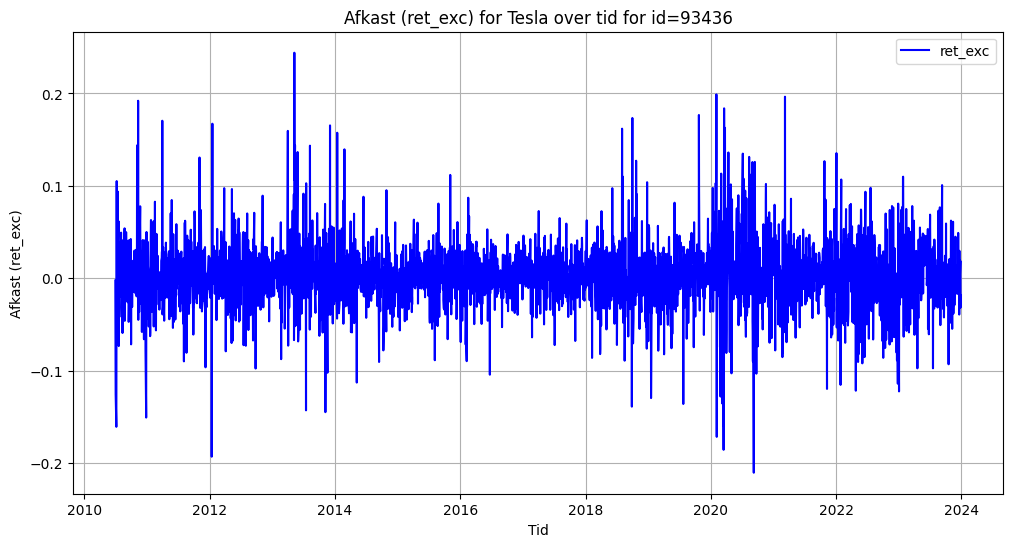

In [23]:
id_number =93436

data_to_plot = df[df['id'] == id_number]

plt.figure(figsize=(12, 6))
plt.plot(data_to_plot['date'], data_to_plot['ret_exc'], label='ret_exc', color='blue')

# Tilføj titler og labels
plt.title(f"Afkast (ret_exc) for Tesla over tid for id={id_number}")
plt.xlabel("Tid")
plt.ylabel("Afkast (ret_exc)")
plt.grid(True)
plt.legend()
plt.show()

In [24]:
data_to_plot.head()

,id,date,ret_exc
103379965,93436,2010-06-30,-0.002518
103379966,93436,2010-07-01,-0.078479
103379967,93436,2010-07-02,-0.125690
103379968,93436,2010-07-06,-0.160944
103379969,93436,2010-07-07,-0.019249


# Tesla fra rå data

In [25]:
tsla_df = pd.read_csv(file_path_tsla)
print("Filen er indlæst succesfuldt.")
tsla_df.head()

Filen er indlæst succesfuldt.


,PERMNO,date,TICKER,COMNAM,TSYMBOL,PERMCO,VOL,RET,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn
0,93436,2010-06-29,TSLA,TESLA MOTORS INC,TSLA,53453,19088009,C,C,-0.032886,-0.032922,-0.031189,-0.031228,-0.031017
1,93436,2010-06-30,TSLA,TESLA MOTORS INC,TSLA,53453,17607305,-0.002511,-0.002511,-0.008948,-0.009029,-0.005544,-0.005580,-0.010113
2,93436,2010-07-01,TSLA,TESLA MOTORS INC,TSLA,53453,8379501,-0.078473,-0.078473,-0.003930,-0.004076,-0.007591,-0.007698,-0.003240
3,93436,2010-07-02,TSLA,TESLA MOTORS INC,TSLA,53453,5255750,-0.125683,-0.125683,-0.004749,-0.004793,-0.004375,-0.004430,-0.004662
4,93436,2010-07-06,TSLA,TESLA MOTORS INC,TSLA,53453,7011230,-0.160938,-0.160938,0.003316,0.003314,-0.006417,-0.006430,0.005359


In [26]:
data_to_plot.tail()

,id,date,ret_exc
103383359,93436,2023-12-22,-0.007905
103383360,93436,2023-12-26,0.015913
103383361,93436,2023-12-27,0.018619
103383362,93436,2023-12-28,-0.031797
103383363,93436,2023-12-29,-0.018767


In [27]:
tsla_df.tail()

,PERMNO,date,TICKER,COMNAM,TSYMBOL,PERMCO,VOL,RET,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn
3395,93436,2023-12-22,TSLA,TESLA INC,TSLA,53453,93148541,-0.007701,-0.007701,0.002440,0.002372,0.007676,0.007387,0.001660
3396,93436,2023-12-26,TSLA,TESLA INC,TSLA,53453,86700724,0.016116,0.016116,0.005218,0.005199,0.009674,0.009299,0.004232
3397,93436,2023-12-27,TSLA,TESLA INC,TSLA,53453,106250779,0.018822,0.018822,0.001995,0.001807,0.005276,0.004907,0.001430
3398,93436,2023-12-28,TSLA,TESLA INC,TSLA,53453,113250680,-0.031594,-0.031594,-0.000108,-0.000295,0.002042,0.001428,0.000370
3399,93436,2023-12-29,TSLA,TESLA INC,TSLA,53453,100321201,-0.018564,-0.018564,-0.004045,-0.004084,-0.007480,-0.007546,-0.002826


In [30]:
tsla_df

,PERMNO,date,TICKER,COMNAM,TSYMBOL,PERMCO,VOL,RET,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn
0,93436,2010-06-29,TSLA,TESLA MOTORS INC,TSLA,53453,19088009,C,C,-0.032886,-0.032922,-0.031189,-0.031228,-0.031017
1,93436,2010-06-30,TSLA,TESLA MOTORS INC,TSLA,53453,17607305,-0.002511,-0.002511,-0.008948,-0.009029,-0.005544,-0.005580,-0.010113
2,93436,2010-07-01,TSLA,TESLA MOTORS INC,TSLA,53453,8379501,-0.078473,-0.078473,-0.003930,-0.004076,-0.007591,-0.007698,-0.003240
3,93436,2010-07-02,TSLA,TESLA MOTORS INC,TSLA,53453,5255750,-0.125683,-0.125683,-0.004749,-0.004793,-0.004375,-0.004430,-0.004662
4,93436,2010-07-06,TSLA,TESLA MOTORS INC,TSLA,53453,7011230,-0.160938,-0.160938,0.003316,0.003314,-0.006417,-0.006430,0.005359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,93436,2023-12-22,TSLA,TESLA INC,TSLA,53453,93148541,-0.007701,-0.007701,0.002440,0.002372,0.007676,0.007387,0.001660
3396,93436,2023-12-26,TSLA,TESLA INC,TSLA,53453,86700724,0.016116,0.016116,0.005218,0.005199,0.009674,0.009299,0.004232
3397,93436,2023-12-27,TSLA,TESLA INC,TSLA,53453,106250779,0.018822,0.018822,0.001995,0.001807,0.005276,0.004907,0.001430
3398,93436,2023-12-28,TSLA,TESLA INC,TSLA,53453,113250680,-0.031594,-0.031594,-0.000108,-0.000295,0.002042,0.001428,0.000370


In [29]:
data_to_plot

,id,date,ret_exc
103379965,93436,2010-06-30,-0.002518
103379966,93436,2010-07-01,-0.078479
103379967,93436,2010-07-02,-0.125690
103379968,93436,2010-07-06,-0.160944
103379969,93436,2010-07-07,-0.019249
...,...,...,...
103383359,93436,2023-12-22,-0.007905
103383360,93436,2023-12-26,0.015913
103383361,93436,2023-12-27,0.018619
103383362,93436,2023-12-28,-0.031797


In [31]:
new_tsla_df = tsla_df.iloc[1:].reset_index(drop=True)
new_tsla_df = new_tsla_df.dropna()
new_data_to_plot = data_to_plot.dropna()
new_tsla_df['RET'] = pd.to_numeric(new_tsla_df['RET'])
new_tsla_df = new_tsla_df.reset_index(drop=True)
new_data_to_plot = new_data_to_plot.reset_index(drop=True)
print(new_tsla_df.index)
print(new_data_to_plot.index)

RangeIndex(start=0, stop=3399, step=1)
RangeIndex(start=0, stop=3399, step=1)


In [32]:


# Beregn dagsrenten
renten = new_tsla_df['RET'] - new_data_to_plot['ret_exc']

# Tjek de første par rækker for at bekræfte beregningen
print(renten)


0       0.000007
1       0.000006
2       0.000007
3       0.000006
4       0.000006
          ...   
3394    0.000204
3395    0.000203
3396    0.000203
3397    0.000203
3398    0.000203
Length: 3399, dtype: float64


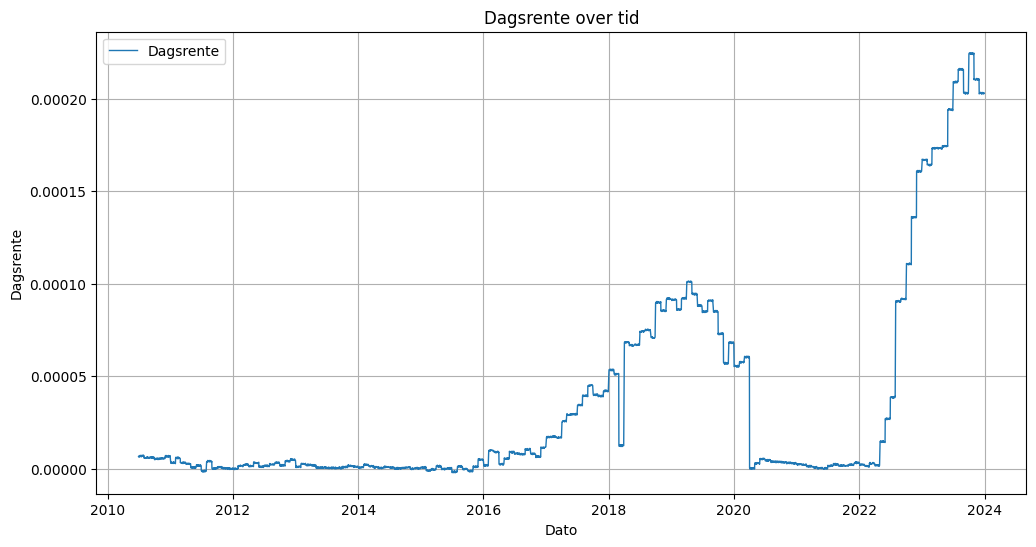

In [33]:
id_number =93436

data_to_plot = df[df['id'] == id_number]

plt.figure(figsize=(12, 6))
plt.plot(data_to_plot['date'], renten, label='Dagsrente', linewidth=1)

# Tilføj labels og titel
plt.xlabel('Dato')
plt.ylabel('Dagsrente')
plt.title('Dagsrente over tid')
plt.legend()
plt.grid(True)

# Vis plottet
plt.show()

# Risk Free Rate

In [46]:
import pandas as pd

file_path_risk_free = "./Data/ff3_m.csv"
try:
    # Læs kun 'RF' kolonnen
    risk_free_df = pd.read_csv(file_path_risk_free, usecols=['RF'])
    print("Filen er indlæst succesfuldt.")
except Exception as e:
    print(f"Der opstod en fejl ved indlæsning af filen: {e}")

Der opstod en fejl ved indlæsning af filen: Usecols do not match columns, columns expected but not found: ['RF']


# Prepare Market data

In [70]:
file_path_market_returns = "./Data/market_returns.csv"
try:
    # Læs kun 'RF' kolonnen
    market_returns_df = pd.read_csv(file_path_market_returns)
    print("Filen er indlæst succesfuldt.")
except Exception as e:
    print(f"Der opstod en fejl ved indlæsning af filen: {e}")

# Eller hvis du vil modificere den originale DataFrame direkte:
market_returns_df = market_returns_df[market_returns_df['excntry'] == 'USA'][['eom', 'mkt_vw_exc']].reset_index(drop=True)
#market_returns_df = market_returns_df[market_returns_df['excntry'] == 'USA'].reset_index(drop=True)

Filen er indlæst succesfuldt.


In [75]:
import Prepare_Data
Prepare_Data.load_and_filter_market_returns(file_path_market_returns)
#load_and_filter_market_returns(file_path_market_returns)

SyntaxError: invalid syntax (Prepare_Data.py, line 2)

In [68]:
market = market_returns_df[market_returns_df['excntry'] == 'USA'][['eom', 'mkt_vw_exc']]

In [71]:
market_returns_df

,eom,mkt_vw_exc
0,1926-01-31,-0.002409
1,1926-02-28,-0.035821
2,1926-03-31,-0.066672
3,1926-04-30,0.033847
4,1926-05-31,0.011772
...,...,...
1171,2023-08-31,-0.024497
1172,2023-09-30,-0.052473
1173,2023-10-31,-0.033872
1174,2023-11-30,0.089042


In [59]:
print(market_returns_df.dtypes)

excntry         object
eom             object
stocks           int64
me_lag1        float64
dolvol_lag1    float64
mkt_vw_lcl     float64
mkt_ew_lcl     float64
mkt_vw         float64
mkt_ew         float64
mkt_vw_exc     float64
mkt_ew_exc     float64
dtype: object


In [63]:
# Filtrér DataFrame og nulstil indekset
market_returns_df_usa = market_returns_df[market_returns_df['excntry'] == 'USA'].reset_index(drop=True)

# Eller hvis du vil modificere den originale DataFrame direkte:
market_returns_df = market_returns_df[market_returns_df['excntry'] == 'USA'].reset_index(drop=True)

In [64]:
market_returns_df

,excntry,eom,stocks,me_lag1,dolvol_lag1,mkt_vw_lcl,mkt_ew_lcl,mkt_vw,mkt_ew,mkt_vw_exc,mkt_ew_exc
0,USA,1926-01-31,489,2.733126e+04,NaN,0.000542,0.023559,0.000542,0.023559,-0.002409,0.020608
1,USA,1926-02-28,494,2.752682e+04,2.655562e+09,-0.033053,-0.053738,-0.033053,-0.053738,-0.035821,-0.056506
2,USA,1926-03-31,500,2.661187e+04,2.206993e+09,-0.063894,-0.096404,-0.063894,-0.096404,-0.066672,-0.099182
3,USA,1926-04-30,505,2.484983e+04,3.155547e+09,0.036919,0.032482,0.036919,0.032482,0.033847,0.029410
4,USA,1926-05-31,507,2.566764e+04,1.962540e+09,0.012114,0.000650,0.012114,0.000650,0.011772,0.000308
...,...,...,...,...,...,...,...,...,...,...,...
1171,USA,2023-08-31,5053,4.970456e+07,7.251132e+12,-0.019960,-0.066369,-0.019960,-0.066369,-0.024497,-0.070906
1172,USA,2023-09-30,5032,4.859957e+07,7.611371e+12,-0.048206,-0.067957,-0.048206,-0.067957,-0.052473,-0.072224
1173,USA,2023-10-31,5006,4.615499e+07,6.307860e+12,-0.029157,-0.079898,-0.029157,-0.079898,-0.033872,-0.084613
1174,USA,2023-11-30,4982,4.463153e+07,6.836627e+12,0.093466,0.083090,0.093466,0.083090,0.089042,0.078666


In [53]:
import pandas as pd

# Læs CSV-filen med pandas
market = pd.read_csv(file_path_market_returns, 
                     parse_dates=['eom'], 
                     date_parser=lambda x: pd.to_datetime(x, format='%Y%m%d'))

# Filtrer data for USA og vælg de ønskede kolonner
market = market[market['excntry'] == 'USA'][['eom', 'mkt_vw_exc']]

# Omdøb 'eom' kolonnen til 'eom_ret'
market = market.rename(columns={'eom': 'eom_ret'})

# Sørg for, at 'eom_ret' er en dato
market['eom_ret'] = pd.to_datetime(market['eom_ret'])

C:\Users\andre\AppData\Local\Temp\ipykernel_20688\3822414199.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  market = pd.read_csv(file_path_market_returns,


ValueError: time data "2001-06-30" doesn't match format "%Y%m%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.